Distribution of MI scores of entries in several thesauri. Do thesauri just happen to contain better features?

In [1]:
%cd ~/NetBeansProjects/thesisgenerator/
from thesisgenerator.utils.conf_file_utils import parse_config_file
from thesisgenerator.utils.data_utils import get_tokenized_data, get_tokenizer_settings_from_conf
from thesisgenerator.plugins.bov import ThesaurusVectorizer
from discoutils.thesaurus_loader import Vectors
from sklearn.feature_selection import f_classif, chi2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from thesisgenerator.utils.misc import calculate_log_odds
from scipy.sparse import csr_matrix
%matplotlib inline

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/thesisgenerator


In [148]:
conf, configspec_file = parse_config_file('conf/exp1/exp1_base.conf')
tr_data = conf['training_data'] + '.gz'
xtr, ytr, _, _ = get_tokenized_data(tr_data,
                                        get_tokenizer_settings_from_conf(conf))

X, vocab = ThesaurusVectorizer(min_df=0).fit_transform(xtr)
vocab = {str(k): v for k,v in vocab.items()}

In [3]:
fvalues, pvalues = f_classif(X, ytr)

In [4]:
scores = {}
paths = ['../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Baroni.events.filtered.strings',
        '../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Add.events.filtered.strings',
        '../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Left.events.filtered.strings',
        '../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Right.events.filtered.strings']
for path in paths:
    v = Vectors.from_tsv(path)
    scores_this_composer = []
    for i, (df, idx) in enumerate(vocab.items()):
        if df in v:
            scores_this_composer.append(fvalues[idx])
    scores[path] = scores_this_composer

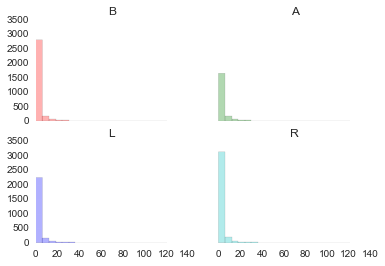

In [5]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True)
names, colors = 'BALR', 'rgbc'
for i, (_, vals) in enumerate(scores.items()):
    axes.flat[i].hist(vals, bins=20, alpha=.3, color=colors[i]);
    axes.flat[i].set_title(names[i])
plt.savefig('midist.pdf', format='pdf')

In [6]:
X1 = [
        [1, 1, 0, 0],
        [1, 1, 1, 0],
        [0, 1, 1, 1],
        [0, 0, 1, 1],
    ]
y1 = np.array([0, 0, 1, 1])
f_classif(X1, y1)

(array([ inf,   1.,   1.,  inf]),
 array([ 0.        ,  0.42264973,  0.42264973,  0.        ]))

In [7]:
calculate_log_odds(csr_matrix(X1), y1)

array([ 14.50865824,   0.69314668,  -0.69314668, -14.50865824])

# what happens to good classifier features when redirected through a thesaurus

shape is (2000, 47370)


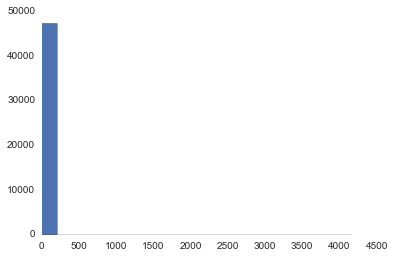

In [8]:
# are very informative features (ones strongly associated with class C)
# replaced by other informative feats or not?
print('shape is', X.shape)
a, b = chi2(X, ytr) # small values of A mean informative features
plt.hist(a, bins=20);

In [261]:
ytr[ytr != 'Automotive'] = 'NotAutomotive' # lo_score assumes two classes, let's make it that was
# pre-select features using chi2 (much faster, but selects both positive and negative features)
premask, _ = f_classif(X, ytr)
# %time lo_automotive = calculate_log_odds(X, ytr, column_indices=np.argsort(premask)[:1000])
# %time lo_automotive = calculate_log_odds(X, ytr, column_indices=set(np.random.randint(0,X.shape[1],20000)))
%time lo_automotive = calculate_log_odds(X, ytr)

CPU times: user 38.7 s, sys: 135 ms, total: 38.8 s
Wall time: 39.9 s


18.09217669226155

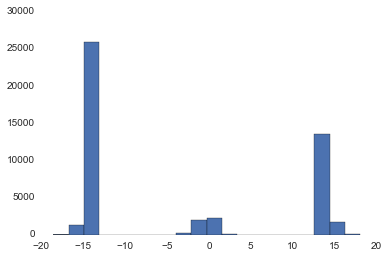

In [262]:
plt.hist(lo_automotive, bins=20);
max(lo_automotive)

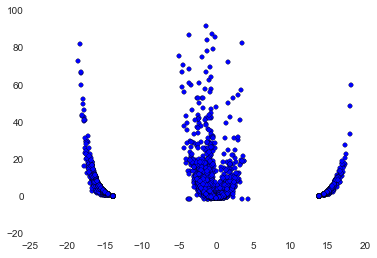

In [263]:
premask[premask>100] = -1
plt.scatter(lo_automotive, premask);
# looks like there are both good and bad features (according to chi2) in terms of LO score

In [264]:
# import pandas as pd
# density_df = pd.DataFrame({'X':lo_automotive[:100], 'Y':premask[:100]})
# sns.kdeplot(lo_automotive[:100], premask[:100])
# data = np.vstack([lo_automotive[:100], premask[:100]])
# sns.kdeplot(density_df.ix[:11], shade=True);
# data.shape
# density_df

In [265]:
orig_lo_automotive = lo_automotive.copy()
lo_automotive[np.asarray(X.sum(axis=0)).ravel() < 5] = 0 # de-select infreq features
# lets look at the informative features
inv_vocab = {v:k for k,v in vocab.items()}
good_feats_idx = np.where(lo_automotive>10)[0] # index of 100 most informative features (either for or against automotive)
good_feats = set(str(inv_vocab[idx]) for idx in good_feats_idx)
good_feats, len(good_feats)

({'acceleration/N',
  'accelerator/N',
  'accord/N',
  'accord/N_works/N',
  'actron/N',
  'add/V_patch/N',
  'adhesion/N',
  'adhesive/N',
  'air/N_compressor/N',
  'air/N_tool/N',
  'alarm/N',
  'album/N',
  'alcohol/N_pad/N',
  'allow/V_air/N',
  'allow/V_fuel/N',
  'amazon/N_customer/N',
  'amp/N',
  'amp/N_fuse/N',
  'anchor/V_seat/N',
  'antenna/N_topper/N',
  'anvil/N',
  'atv/N',
  'auto/N_store/N',
  'auto/N_ventshade/N',
  'automotive/J',
  'av/N',
  'avenger/N',
  'bad/J_choice/N',
  'baldor/N',
  'bar/N_force/N',
  'bass/N',
  'battery/N_charger/N',
  'bearing/N',
  'bearing/N_buddy/N',
  'best/J_belt/N',
  'better/J_tie/N',
  'binder/N',
  'black/J_jacket/N',
  'blazer/N',
  'blitz/N',
  'boat/N_cushion/N',
  'boat/N_mirror/N',
  'boat/N_motor/N',
  'boat/N_trailer/N',
  'bonnet/N',
  'brain/N',
  'brass/N',
  'breath/N_deflector/N',
  'bronco/N',
  'buffer/N',
  'bug/N_deflector/N',
  'bug/N_shield/N',
  'bugflector/N',
  'bung/N',
  'buy/V_charger/N',
  'buy/V_helmet/N',

In [330]:
v1 = Vectors.from_tsv('../FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_15percent-rep0_Add.events.filtered.strings', allow_lexical_overlap=False)
v2 = Vectors.from_tsv('../FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_50percent-rep0_Add.events.filtered.strings', allow_lexical_overlap=False)
v3 = Vectors.from_tsv('../FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-gigaw_100percent-rep0_Add.events.filtered.strings', allow_lexical_overlap=False)

In [329]:
v4 = Vectors.from_tsv('../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Baroni.events.filtered.strings', allow_lexical_overlap=False)
v5 = Vectors.from_tsv('../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Add.events.filtered.strings', allow_lexical_overlap=False)

In [328]:
v6 = Vectors.from_tsv('../FeatureExtractionToolkit/glove/AN_NN_glove-wiki_Add.events.filtered.strings', allow_lexical_overlap=False)

In [331]:
def evaluate(v):
    phrases = [str(s) for s in vocab.keys()]
    v.init_sims(vocab=phrases, n_neighbors=5) # 1000
    
    # test 1- set overlap of good neighbours
    lengths = []
    for feat in good_feats:
        neigh = v.get_nearest_neighbours(feat)
        if neigh:
            neigh = set(x[0] for x in neigh)
            inters = neigh.intersection(good_feats)
            lengths.append(len(inters))
    #         print(feat, 'inters', inters)
    #     else:
    #         print('no neigh for', feat)
    print('mean overlap', np.mean(lengths))
    
    # test 2- how many good feats get messed up
    data = []
    for feat in good_feats:
        neigh = v.get_nearest_neighbours(feat)
        if neigh:
            neigh = set(x[0] for x in neigh[:3])
            data.append([lo_automotive[vocab[feat]]] + [orig_lo_automotive[vocab[n]] for n in neigh])
    #         print(, '-->', ','.join('%1.1f'%))
    df = pd.DataFrame(data, columns=['orig', 'r1', 'r2', 'r3'])
    # plt.hist(df[[1,2,3]].sum(axis=1));
    # df.apply(pd.Series.round)
    flat = df[[1,2,3]].values.flat
#     plt.hist(flat, bins=31);
    print('positive feats getting mangled:', 
          np.count_nonzero(flat < 0)/len(flat), 
          np.count_nonzero(flat > 0)/len(flat))
#     ,np.count_nonzero(flat > 10)/len(flat))

In [332]:
evaluate(v3)

mean overlap 0.245398773006
positive feats getting mangled: 0.38445807770961143 0.45194274028629855


In [333]:
evaluate(v1)

mean overlap 0.242677824268
positive feats getting mangled: 0.33751743375174337 0.4909344490934449


In [334]:
evaluate(v2)

mean overlap 0.192771084337
positive feats getting mangled: 0.3654618473895582 0.46586345381526106


In [335]:
evaluate(v4)

mean overlap 0.153284671533
positive feats getting mangled: 0.5474452554744526 0.36739659367396593


In [336]:
evaluate(v5)

mean overlap 0.0888888888889
positive feats getting mangled: 0.5370370370370371 0.35


In [337]:
evaluate(v6)

mean overlap 0.228571428571
positive feats getting mangled: 0.4326530612244898 0.4204081632653061


In [338]:
X.shape

(2000, 47370)

In [144]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
cross_val_score(MultinomialNB(alpha=0.001), X, ytr, cv=10).mean()
# clf = MultinomialNB(alpha=0.001).fit(X,ytr)
# accuracy_score(clf.predict(X), ytr)

0.95700000000000007

In [312]:
set(ytr)

{'Automotive', 'NotAutomotiv'}

In [355]:
v1.init_sims(vocab=phrases, n_neighbors=5)
v4.init_sims(vocab=phrases, n_neighbors=5)
v6.init_sims(vocab=phrases, n_neighbors=5)

In [364]:
# for v in [v1,v2,v3,v4,v5,v6]:
v1.allow_lexical_overlap = True

    
for feat in good_feats:
    if all(feat in v for v in [v1, v4, v6]):
        if not feat.count('_'):
            continue
        print(feat)
        for v in [v1, v4, v6]:
            print(v.get_nearest_neighbours(feat))
            print('-')
        print('###########')

air/N_compressor/N
[]
-
[('current/J_emblem/N', 0.14328260125964493), ('small/J_child/N', 0.14330716544783453), ('small/J_battery/N', 0.14375416895491175), ('free/J_odor/N', 0.14559089092411068)]
-
[]
-
###########
oil/N_filter/N
[]
-
[('largest/J_gal/N', 0.61409617295122132), ('second/J_bottle/N', 0.64371820717524608), ('small/J_box/N', 0.64522997753074474), ('largest/J_cage/N', 0.65401134595686405)]
-
[]
-
###########
air/N_tool/N
[('drill/N_application/N', 2.1884428251337433), ('quality/J_unit/N', 2.2096513187445836), ('installation/N', 2.2788144703413837)]
-
[('high/J_cost/N', 3.9389314543953415), ('total/J_improvement/N', 4.0662816128339108), ('new/J_food/N', 4.1353486251294589)]
-
[]
-
###########
oil/N_change/N
[]
-
[('major/J_emergency/N', 23.896164182794973), ('major/J_difference/N', 25.501486647651149), ('early/J_relationship/N', 29.773893658386079)]
-
[]
-
###########
cup/N_holder/N
[]
-
[('market/N_brand/N', 2.6322780023647301), ('second/J_game/N', 2.7303761710690231), ('cu